Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


/usr/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


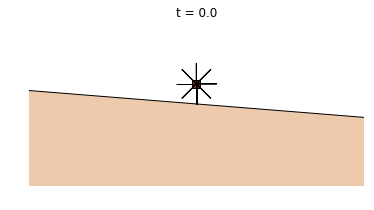

In [2]:
import argparse
import math
import numpy as np

from pydrake.all import (Box,
                         DiagramBuilder,
                         FindResourceOrThrow,
                         FloatingBaseType,
                         Isometry3,
                         RigidBodyTree,
                         Simulator,
                         VisualElement)
from pydrake.examples.rimless_wheel import (RimlessWheel, RimlessWheelParams)
from underactuated import (PlanarRigidBodyVisualizer)


tree = RigidBodyTree(FindResourceOrThrow(
                        "drake/examples/rimless_wheel/RimlessWheel.urdf"),
                     FloatingBaseType.kRollPitchYaw)
params = RimlessWheelParams()
R = np.identity(3)
R[0, 0] = math.cos(params.slope())
R[0, 2] = math.sin(params.slope())
R[2, 0] = -math.sin(params.slope())
R[2, 2] = math.cos(params.slope())
X = Isometry3(rotation=R, translation=[0, 0, -5.])
color = np.array([0.9297, 0.7930, 0.6758, 1])
tree.world().AddVisualElement(VisualElement(Box([100., 1., 10.]), X, color))
tree.compile()

builder = DiagramBuilder()
rimless_wheel = builder.AddSystem(RimlessWheel())

visualizer = builder.AddSystem(PlanarRigidBodyVisualizer(tree,
                                                         xlim=[-8., 8.],
                                                         ylim=[-4., 4.]))
builder.Connect(rimless_wheel.get_output_port(1), visualizer.get_input_port(0))

diagram = builder.Build()
simulator = Simulator(diagram)
simulator.set_target_realtime_rate(1.0)
simulator.set_publish_every_time_step(False)
simulator.get_mutable_context().set_accuracy(1e-4)

state = simulator.get_mutable_context().get_mutable_continuous_state_vector()
state.SetFromVector([0, 1])

simulator.StepTo(10)
